# INF200 Lecture No Ju08

### Hans Ekkehard Plesser with material by Jonas van den Brink
### 9 June 2021

## Today's topics
- Classic population dynamics models
- From discrete to continuous model
- Analysis of BioSim Dynamics

## Classic models

### Lotka-Volterra model

- Classic model of predator-prey population dynamics
- Each species is represented by a single density variable
- Dynamics are described by coupled, non-linear differential equations
\begin{align}
\dot{x} &= \alpha x - \beta x y  \\
\dot{y} &= \delta xy - \gamma y 
\end{align}
where $x$ is prey and $y$ is predator.
- Notes:
    - Solutions are continuous functions
    - Fractional values for $x$ and $y$ are possible, and animals never become extinct
    - One can remove three out of the four parameters by re-scaling
- See also [Wikipedia](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
def du_dt(u, t=0):
    alpha = 1.0 # growth of prey
    beta = 0.1  # rate of predation
    delta = 0.075 # growth of predators
    gamma = 1.5 # decay of predators

    x, y = u
    return np.array([alpha*x - beta*x*y, 
                     delta*x*y - gamma*y])

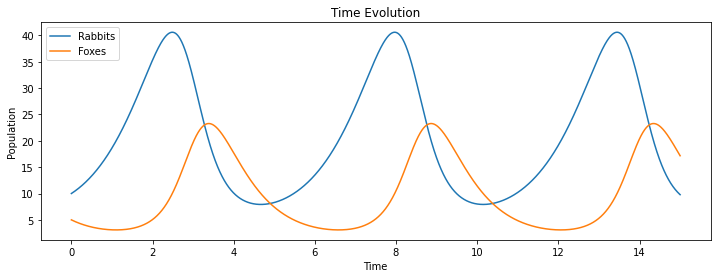

In [4]:
t = np.linspace(0, 15, 100001)
u = scipy.integrate.odeint(du_dt, (10, 5), t)

rabbit, fox = u[:, 0], u[:, 1]

plt.plot(t, rabbit)
plt.plot(t, fox)
plt.legend(['Rabbits', 'Foxes'], loc='upper left')
plt.title('Time Evolution')
plt.xlabel('Time')
plt.ylabel('Population');

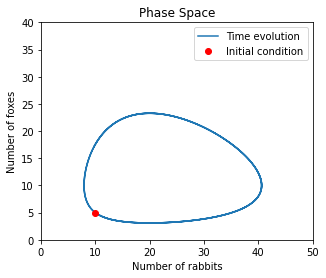

In [5]:
plt.plot(rabbit, fox)
plt.title('Phase Space')
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.axis([0, 50, 0, 40])
plt.plot(10, 5, 'ro')
plt.gca().set_aspect(aspect='equal')
plt.legend(['Time evolution', 'Initial condition']);

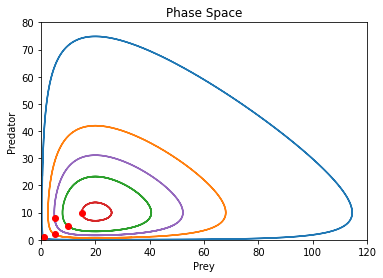

In [6]:
for u0 in [(1, 1), (5, 2), (10, 5), (15, 10), (5, 8)]:
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1])
    plt.plot(u0[0], u0[1], 'ro')

plt.title('Phase Space')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 120, 0, 80]);

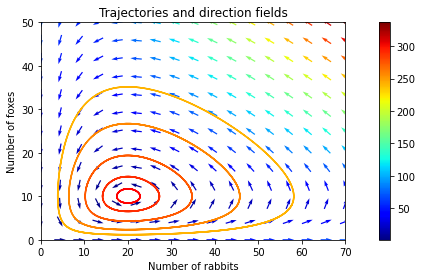

In [7]:
# Plot trajectories
values = ((6, 3), (9, 4), (12, 6), (15, 8), (18, 9))
colors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))

for u0, col in zip(values, colors):
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1], color=col)

# Plot phase space direction arrows
x = np.linspace(0, 70, 17)
y = np.linspace(0, 50, 13)
X, Y = np.meshgrid(x, y)
DX, DY = du_dt([X, Y])

# Normalize direction vectors
M = np.hypot(DX, DY)
M[M == 0] = 1.                                 # Avoid zero division errors
DX /= M                                        # Normalize each arrows
DY /= M

plt.title('Trajectories and direction fields')
plt.quiver(X, Y, DX, DY, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 70, 0, 50]);
plt.colorbar();

#### The Lotka-Volterra is quite different from the BioSim model

- No spatial distribution (comparable to a single BioSim cell)
- Continuous, rather than discrete, in time
- Assumes infinite fodder for the prey/herbivores
- No random elements, it is a fully deterministic model
- Animals can never die out—why?

### Agent-based models

- A model such as the BioSim model is known as an *agent-based* model, because we have acting individuals.
- For a recent scientific paper comparing a continuous to an agent-based model of locust migration, see

    Bernoff AJ, Culshaw-Maurer M, Everett RA, Hohn ME, Strickland WC, Weinburd J (2020) 
    
    Agent-based and continuous models of hopper bands for the Australian plague locust: How resource consumption mediates pulse formation and geometry. 
    
    PLoS Comput Biol 16(5):e1007820. https://doi.org/10.1371/journal.pcbi.1007820

------------------

## From discrete to continuous model

Here we show an example of moving from a discrete to a continious model, for the case of a random walk


- Consider a symmetric random walk in one dimension
- Each time step $\Delta t$, the walker walks a distance $\Delta x$ in either direction
- Thus time and space are both discrete $x_k = k\Delta x$, $t_j = j\Delta t$

The main quantitiy of interest is the probability that the walker is in a specific location, $x_k$, at the next time step $t_{j+1}$, we write this probability simply as $P_k(j+1)$.

As the walker always take a step left or right with equal probability, we can write it out as
$$P_k(j+1) = \frac{1}{2}P_{k+1}(j) + \frac{1}{2}P_{k-1}(j).$$


We will now do some strange mathematical manipulations to this expression, first we subtract $P_k(j)$ on both sides
$$P_k(j+1) - P_k(j)  = \frac{P_{k+1}(j) - 2P_{k}(j) + P_{k-1}(j)}{2}.$$
And then we divide by $\Delta t$ on both sides, and introduce a $\Delta x^2 / \Delta x^2 = 1$ factor on the right hand side
$$\frac{P_k(j+1) - P_k(j)}{\Delta t} = \frac{\Delta x^2}{2\Delta t} \frac{P_{k+1}(j) - 2P_{k}(j) + P_{k-1}(j)}{\Delta x^2}.$$


* Now comes the mathemagical transition from discrete to continuous
    - We let $\Delta t \to 0$, and $\Delta x \to 0$
    - But in a manner keeps the factor $D=\Delta x^2/2\Delta t$ constant
    
$$\lim_{\substack{\Delta t \to 0 \\ \Delta x \to 0 \\ D={\rm const.}}} 
\bigg[\frac{P_k(j+1) - P_k(j)}{\Delta t} = D \frac{P_{k+1}(j) - 2P_{k}(j) + P_{k-1}(j)}{\Delta x^2}\bigg].$$
Which can be simplified into
$$
\lim_{\Delta t \to 0} \frac{P_k(j+1) - P_k(j)}{\Delta t} = D \lim_{\Delta x \to 0} \frac{P_{k+1}(j) - 2P_{k}(j) + P_{k-1}(j)}{\Delta x^2}.$$


Now we recognize the limits as the definitions of the continuous derivatives of $P$! Writing it out with a more compact mathematical notation we have end up at the equation
$$\frac{\partial P(x, t)}{\partial t} = D \frac{\partial^2 P(x, t)}{\partial x^2}.$$

This is the **diffusion equation** in one-dimension, also known as the heat equation. This is one of the most fundamental and important equations in the natural sciences, so it is quite astonishing that it can be derived from a simple random walker!

For more information and more detailed derivations, see for example:
- [Mark Kac's classical paper from 1947](http://www.math.hawaii.edu/~xander/Fa06/Kac--Brownian_Motion.pdf)
- N.G. van Kampen, [*Stochastic Processes in Physics and Chemistry*](https://books.google.no/books?id=N6II-6HlPxEC&printsec=frontcover&hl=no#v=onepage&q&f=false), Amsterdam, Elsevier, 2007. 

-------------------

## Exploring the BioSim Model

To have a better understanding of a complex and connected model, it is useful to simplify it and break it into components, which is what we will do now.

This is simply an exploration, not a definite analysis.

### Herbivores

First we look at the herbivores. We only look at the standard set of parameters here (`f_max` for Lowland included for convenience here): 

In [8]:
hp = {'w_birth': 8.,
      'sigma_birth': 1.5,
      'beta': 0.9,
      'eta': 0.05,
      'a_half': 40.,
      'phi_age': 0.6,
      'w_half': 10.,
      'phi_weight': 0.1,
      'mu': 0.25,
      'gamma': 0.2,
      'zeta': 3.5,
      'xi': 1.2,
      'omega': 0.4,
      'F': 10.,
      'f_max': 800.}

#### Fitness function
The Fitness function is defined as the product of two sigmoidal functions, one for age and one for weight.
    $$q^+ = \frac{1}{1+\exp[{\phi_{\rm age}({\rm age} - {\rm age}_{1/2})}]}, \qquad q^- = \frac{1}{1+\exp[-{\phi_{\rm weight}({\rm weight} - {\rm weight}_{1/2})}]}$$

If you look closer at the functions, the biggest difference between them is the sign of the exponent, this makes the age-function monotonically decreasing, and the weight-function monotonically increasing. Let us plot them to get a better view

In [9]:
def q(sgn, x, xhalf, phi):
    return 1. / (1. + np.exp(sgn * phi * (x - xhalf)))

def Phi(a, w, p=hp):
    return (q(+1, a, p['a_half'], p['phi_age'])
            * q(-1, w, p['w_half'], p['phi_weight']))

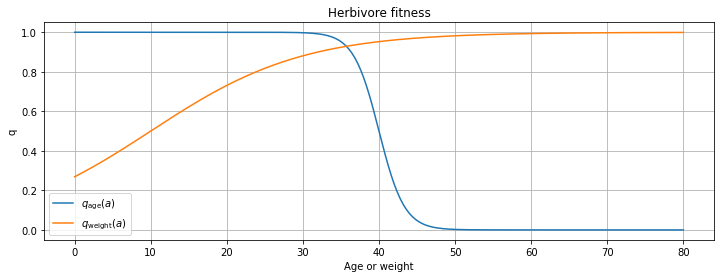

In [10]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plt.title('Herbivore fitness');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Interpretation: As the two functions are multiplied together to yield the fitness, an animal is fitter the younger and heavier it is. A starving or old animal can never be fit.

------------

### Stationary weight for herbivores
- Under the following assumptions
    - Constant number of animals (no birth/death)
    - Infinite fodder

- How heavy will the animals become?

- Let $w_0$ be the birth weight of the animal, then the weight at the end of the first and second year is
\begin{align}
w_1 &= (1-\eta)(w_0 + \beta F), \\
w_2 &= (1-\eta)(w_1 + \beta F) = (1-\eta)\left((1-\eta)(w_0 + \beta F) + \beta F\right).
\end{align}
And for year $n$:
\begin{align}
w_n &= (1-\eta)(w_{n-1} + \beta F) = (1-\eta)^n w_0 + \beta F \sum_{k=1}^{n}(1-\eta)^k\\
    &= (1-\eta)^n w_0 + \beta F \frac{(1-\eta)-(1-\eta)^{n+1}}{\eta}
\end{align}

This formula for $w_n$ is a testable prediction for the time evolution of the BioSim model with given parameters.

The stationary weight, $\bar{w}$, is the 'stable' weight where the weight is not changing any more
$$\bar{w} = (1-\eta)(\bar{w} + \beta F)$$
Which can be solved to yield
        $$\bar{w} = \frac{1-\eta}{\eta}\beta F.$$

We obtain the same result by taking
$$\bar{w}=\lim_{n\to\infty}w_n=\beta F\frac{1-\eta}{\eta}$$
- For standard parameters, we have

In [11]:
print('Expected stationary weight for herbivores: {:.1f}'.format(
        (1-hp['eta'])/hp['eta'] * hp['beta'] * hp['F']))

Expected stationary weight for herbivores: 171.0


- This is a testable prediction.
- It is confirmed by simulation.

---------------------

### The life of a Herbivore

Our reference simulation for Herbivores in a single lowland location shows the following situation after 200 years

![stat](../../january-block/lectures/figures/mono_hoh_2345_00020.png)




We would like to understand better why we observe this behavior, especially the number of animals in the stationary state.

**The remainder of this notebook is an attempt at analysis. It still requires proper validation.**

#### First observations
- Approximately $N=200$ animals on the island
- The weight distribution shows three modes
    - around $8$, $15$ and $25$ units
- There are no animals with weight over $33$ units
- Age has a long tail with very few animals above age 30
- Fitness has three modes, around $0.45$, $0.6$ and $0.8$ 
- Up to age $30$, an animal has high age-fitness $>0.99$
- Beyond weight $15$, an animal has reasonable weight-fitness $>0.6$
- With and appetite of $F=10$ and $f_{\text{max}}=800$ units of fodder available per year, $n_F=80$ animals can eat each year.
- The probability that a Herbivore eats in any given year is thus $p_e=n_F/N=0.4$.

-----------------

## Systematic analysis comparing with detailed experimental data

### Data used

- Data is collected over independent trials
- For each data animal count at end of each year is recorded (csv-file)
- Detailed data for each animal in each year is recorded (pkl-file)
- Consistency of data from both files is tested

#### Data representation

- Data from each trial is loaded as `HerbData` object
- Only data for animals alive in `[yr_min, yr_max)` is included
- A `HerbData` object contains in particular the following fields:
    - `csv_y`, `csv_n`: year and herbivore count at end of year
    - `[y, a, w, f]_all`: year, age, weight and fitness of all animals, immediately before the annual culling
        - Data are masked arrays, one column per animal, one row per year
        - Array `y_all` specifies which year during the simulation data in the other arrays belongs to
    - `[y, a, w, f]_srv`: year, age, weight and fitness of surviving animals, immediately after the annual culling
    - `[y, a, w, f]_coh`: year, age, weight and fitness of complete animal cohorts, i.e. a subset of `?_all` for which we can guarantee that all years in all animals lives are recorded in the data
    - `?c_[all, srv, coh]`: same data as in `?_[all, srv, coh]` but as 1-d arrays with all masked entries removed
    - `tot_w_[all, srv]`: total animal weight per year
    - `wb`: weight at birth for all animals; birth weight is inferred from weight at end of first year using `params['eta']`
    - `ad`, `wd`, `fd`: age, weight and fitness at moment of death, for all animals
    - `n_all`: number of animals that lived for at least one year in `[yr_min, yr_max)`
    - `n_birth`: number of animals born in `[yr_min, yr_max)`
    - `n_death`: number of animals who died in `[yr_min, yr_max)`
    - `cnt_[all, srv]`: number of animals alive in any given year, before/after culling
    - `cnt_y`: year corresponding to `cnt_???` data
    
#### Data interpretation

- Animal counts
    - `csv_n` data is animal count at very end of year, *after culling*, and should be identical to `cnt_srv`
    - `cnt_all` will be higher, since it includes the newborns of the year and those animals that will die during the year
- Eating and procreation are based on the survivor populations `_srv`.
- Death is based on the population of all animals `_all`.

In [13]:
import seaborn as sns
from scipy import stats
from helpers.herbdata import HerbData
import glob

In [15]:
yr_min, yr_max = 100, 400
hd = [HerbData(fname.split('.')[0], params=hp, yr_min=yr_min, yr_max=yr_max) 
      for fname in glob.glob('data_j08/mono_hol_744*.pkl')]
n_trials = len(hd)

### Look at lives of a few animals

In [16]:
def find_events(w):
    wn_ne = w[:-1] * (1-hp['eta'])  # just weight loss
    wn_eo = (w[:-1] + hp['beta']*hp['F']) * (1-hp['eta']) # eating and weight loss, no birth
    
    # first entry for _ne is True because animals do not eat in the year they are born
    ix_ne = np.hstack([np.array([True]), np.isclose(w[1:], wn_ne)])
    ix_eo = np.hstack([np.array([False]), np.isclose(w[1:], wn_eo)])
    ix_birth = ~ix_ne & ~ix_eo
    
    return ix_birth, ix_ne, ix_eo

In [17]:
def plot_lifeline(dc, dw, k):
    ib, ine, ie = find_events(dw[:, k])
    plt.plot(dc[:, k], dw[:, k], 'v-', lw=2, markersize=10);
    plt.plot(dc[ib, k], dw[ib, k], 'ro', markersize=10);
    plt.plot(dc[ie, k], dw[ie, k], 'ms', markersize=10);

##### Weight development in stationary state
- small subset of animals
- lines/triangles: one color per animal
- triangles: animal only lost weight
- magenta squares: animal just ate
- red circles: animal ate and gave birth

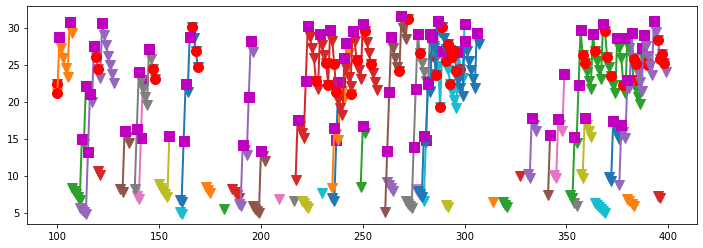

In [18]:
for k in range(0, hd[0].y_all.shape[1], 200):
    plot_lifeline(hd[0].y_all, hd[0].w_all, k)

### Population size

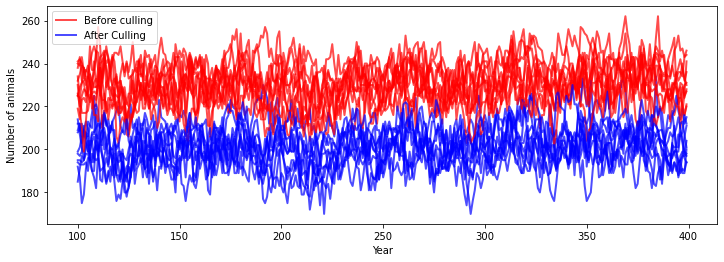

In [20]:
for h in hd:
    plt.plot(h.cnt_y, h.cnt_all, 'r', lw=2, alpha=0.7)
    plt.plot(h.cnt_y, h.cnt_srv, 'b', lw=2, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of animals')
plt.legend(['Before culling', 'After Culling']);

- The plot shows results from 10 trials overlaid.
- Red data are animal numbers before culling, i.e., previous year's survivors plus newborns.
- Blue data are numbers after culling, i.e., the animals surviving till the following year
- Data look stationary.

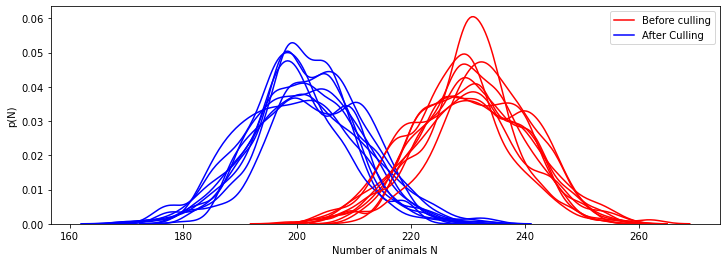

In [21]:
for h in hd:
    sns.kdeplot(h.cnt_all, bw_method=0.25, color='r', alpha=0.5)
    sns.kdeplot(h.cnt_srv, bw_method=0.25, color='b', alpha=0.5);
    
plt.xlabel('Number of animals N')
plt.ylabel('p(N)')
plt.legend(['Before culling', 'After Culling']);

In [22]:
cnt_stat = np.array([(h.cnt_all.mean(), h.cnt_all.std(), 
                      h.cnt_srv.mean(), h.cnt_srv.std())
                     for h in hd])

Na_mean = cnt_stat[:, 0].mean()
Ns_mean = cnt_stat[:, 2].mean()
Na_sem = np.sqrt((cnt_stat[:, 1]**2).mean()/(n_trials-1))
Ns_sem = np.sqrt((cnt_stat[:, 3]**2).mean()/(n_trials-1))

print(f'Mean pre-cull population N_a : {Na_mean:.1f} ± {Na_sem:.2f}')
print(f'Mean post-cull population N_s: {Ns_mean:.1f} ± {Ns_sem:.2f}')
print( 'Mean pre-post difference     : {:.2f}'.format(Na_mean-Ns_mean))

Mean pre-cull population N_a : 230.5 ± 3.09
Mean post-cull population N_s: 201.3 ± 3.05
Mean pre-post difference     : 29.16


- Distribution graphs show some variation between trials, but structure is the same.
- Mean size of post-culling population is in accordance with earlier observations.
- Standard error of mean is small, estimates are reliable.

### Weight and age distributions

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

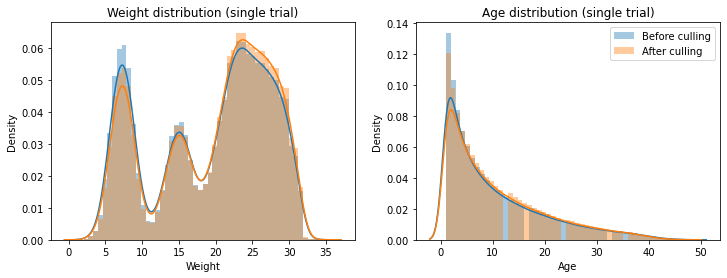

In [24]:
plt.subplot(1, 2, 1)
sns.distplot(hd[0].wc_all, label='Before culling')
sns.distplot(hd[0].wc_srv, label='After culling')
plt.xlabel('Weight');
plt.title('Weight distribution (single trial)');

plt.subplot(1, 2, 2)
sns.distplot(hd[0].ac_all, label='Before culling')
sns.distplot(hd[0].ac_srv, label='After culling')
plt.xlabel('Age');
plt.legend();
plt.title('Age distribution (single trial)');

- The weight distribution shows three clear groups: babies, juveniles and adults.
- Babies die more frequently than adults, thus culling shifts the weight distribution towards adults.

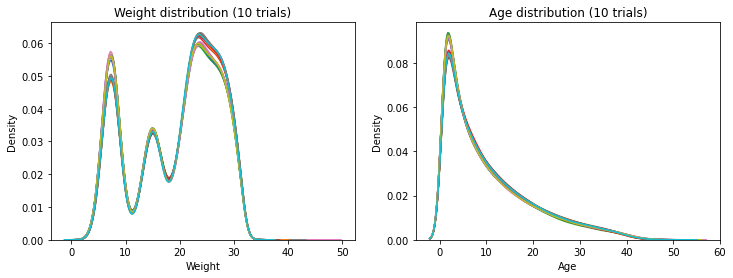

In [25]:
plt.subplot(1, 2, 1)
for h in hd:
    sns.kdeplot(h.wc_all)
    sns.kdeplot(h.wc_srv)
plt.xlabel('Weight');
plt.title('Weight distribution (10 trials)');

plt.subplot(1, 2, 2)
for h in hd:
    sns.kdeplot(h.ac_all)
    sns.kdeplot(h.ac_srv)
plt.xlabel('Age');
plt.title('Age distribution (10 trials)');

- Figures show kernel density estimates (but not histograms) for 10 different trials.
- Differences between trials are are very small.
- Differences between before and after culling are clearly visible for baby and adult weights and young ages.

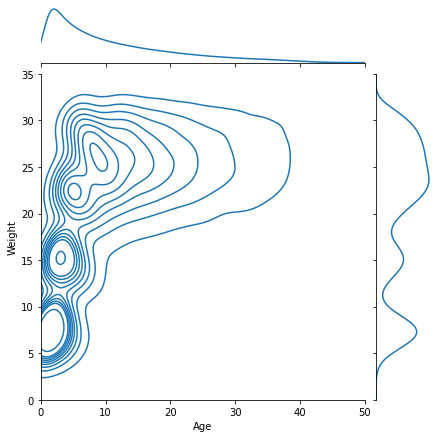

In [26]:
sns.jointplot(hd[0].ac_srv, hd[0].wc_srv, kind='kde',
              xlim=[0, 50], ylim=[0, 35]).set_axis_labels('Age', 'Weight');

The joint probability plot shows some clear structures
1. A tight and sizeable baby density for ages below 5 and weights below 10
1. An also quite tight juvenile density around age 4 and weight 15
1. Two adult groups around age 6 and weight 22 and around weight 10 and weight 25
1. A wider continuum of adults with ages towards 30 and weights between 20 and 30,

### Weight development from year to year

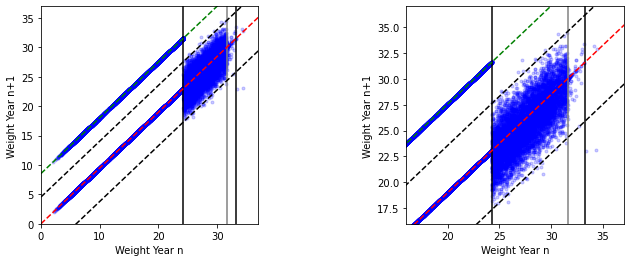

In [27]:
w_certain_birth = hp['zeta'] * (hp['w_birth'] + hp['sigma_birth'])
w_min_fertile = w_certain_birth - hp['beta'] * hp['F']
ww = np.array([0, 40]);

def ww_plot(xymin=0, xymax=37):
    plt.scatter(hd[0].w_srv[:-1, :], hd[0].w_srv[1:, :], c='b', marker='.', alpha=0.2);
    plt.plot(2*[w_min_fertile], ww, 'k-');
    plt.plot(2*[w_certain_birth*(1-hp['eta'])], ww, color='#808080');
    plt.plot(2*[w_certain_birth], ww, 'k-');
    plt.plot(ww, ww*(1-hp['eta']), 'r--');
    plt.plot(ww, (ww+hp['beta']*hp['F'])*(1-hp['eta']), 'g--');
    plt.plot(ww, (ww+hp['beta']*hp['F']-hp['xi']*(hp['w_birth']+3*hp['sigma_birth']))*(1-hp['eta']), 'k--');
    plt.plot(ww, (ww+hp['beta']*hp['F']-hp['xi']*(hp['w_birth']-3*hp['sigma_birth']))*(1-hp['eta']), 'k--');

    plt.gca().set_aspect('equal');
    plt.xlim(xymin, xymax);
    plt.ylim(xymin, xymax);
    plt.xlabel('Weight Year n');
    plt.ylabel('Weight Year n+1');
    
plt.subplot(1, 2, 1)
ww_plot()

plt.subplot(1, 2, 2)
ww_plot(16, 37)

The plot of weight in year n+1 vs weight in year n shows some of the dynamics of the system.
- Each point in the diagram corresponds to one animal moving from one year to the next.
- Points on the red dashed line correspond to animals just losing weight.
- Points on the green dashed line correspond to animals eating that year.
- The right vertical black line marks $w^*=\zeta(w_b+\sigma_b)$, the minimum weight for giving birth.
- The left vertical black line marks $w^*-\beta F$, the smallest weight from which an animal can reach $w^*$ by eating once.
- The vertical grey line marks $(1-\eta)w^*$.
- The diagonal dashed black lines correspond to giving birth to a baby with a birthweight $w_b\pm 3\sigma_b$.

What do the plots show us?
- The points on the red and green lines show that weightloss and eating works as expected.
- The widely scattering data between the vertical lines shows that birth changes weights as expected, and the dashed diagonals corresponding to $\pm 3\sigma$ that change to parent weights follow expected birth weights properly.
- Animals will typically cross $w^*$ by eating, and then lose $\sim \xi \mathcal{N}(w_b, \sigma_b)$ in weight, bringing their weight below $w^*$ again in most cases.
- Any animal with a weight between the grey and right black line will drop below the grey line due to annual weight loss, whence we have only very few points between those two lines.
- Points to the right of the grey line are animals that have just given birth to a very light baby, so after eating and then giving birth, they actually increased their weight.
- Any animal to the right of the right black line can give birth even without eating. 
- The lonely data point to the right of the right black line and well below the $-3\sigma_b$ dashed line corresponds to an animal that gave birth without eating.

Overall, all data in the figures are consistent with a correct model implementation.

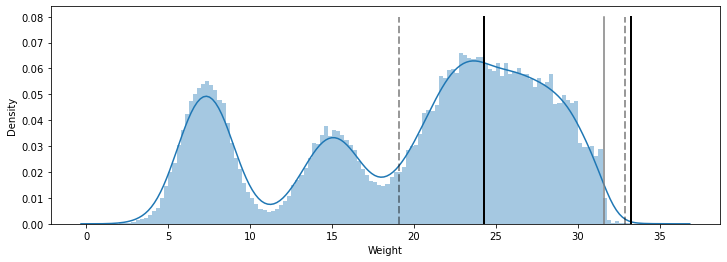

In [28]:
sns.distplot(hd[0].wc_srv, bins=np.arange(0, 35, 0.25), kde_kws={'bw': 0.1, 'gridsize': 200}, label='All ages');

yy = [0, 0.08]
plt.plot(2*[w_certain_birth], yy, 'k-', lw=2);
plt.plot(2*[w_min_fertile], yy, 'k-', lw=2);
plt.plot(2*[w_certain_birth*(1-hp['eta'])], yy, color='#808080');

w_min_post = (w_min_fertile+hp['beta']*hp['F']-hp['xi']*(hp['w_birth']+2*hp['sigma_birth']))*(1-hp['eta'])
w_max_post = (w_certain_birth*(1-hp['eta'])+hp['beta']*hp['F']-hp['xi']*(hp['w_birth']-2*hp['sigma_birth']))*(1-hp['eta'])
plt.plot(2*[w_min_post], yy, 'k--', lw=2, alpha=0.4);
plt.plot(2*[w_max_post], yy, 'k--', lw=2, alpha=0.4);
plt.xlabel('Weight');

- Weight distribution of surviving animals after culling.
- Solid lines are the same as above, from left to right:
    - minimal weight from which animal can reach $w^*$ by eating once
    - largest possible weight for any animal not giving birth (assuming that any animal with $w>w^*$ after eating will almost certainly give birth)
    - $w^*$
- Dashed lines indicate range of post-birth weight
    - left: lightest possible parent ($w^*-\beta F$), large birth weight $w_b+2\sigma_b$
    - right: heaviest possible parent ($w^*$), small birth weight $w_b-2\sigma_b$

### Birth weights

- Expectation: normal distribution with parameters w_birth, sigma_birth
- Obtain mean, standard deviation and normalcy-test p-value for all trials

In [29]:
wb_check = np.array([(h.wb.mean(), h.wb.std(), stats.normaltest(h.wb).pvalue)
                     for h in hd])
for m, s, p in wb_check:
    print(f'{m:.2f} ± {s:.2f} (p = {p:.3f})')

7.99 ± 1.51 (p = 0.434)
8.02 ± 1.51 (p = 0.371)
7.99 ± 1.50 (p = 0.194)
8.00 ± 1.50 (p = 0.872)
8.00 ± 1.49 (p = 0.703)
7.99 ± 1.49 (p = 0.322)
8.04 ± 1.51 (p = 0.987)
7.98 ± 1.50 (p = 0.056)
7.99 ± 1.51 (p = 0.828)
7.98 ± 1.49 (p = 0.469)


Values for all trials are very close to expectations and p-values do not indicate rejection. So birth weights appear to be correctly distributed.

### Numbers and rates of births and deaths

- This is the total number of births and deaths between yr_min and yr_max
- Expectation: in stationary state, birth and death numbers should balance

In [30]:
n_bd = np.array([(h.n_birth, h.n_death, h.n_birth-h.n_death) for h in hd])
print('Births  Deaths  Diff')
for nb, nd, df in n_bd:
    print(f'{nb:6d}{nd:8d}{df:6d}')

Births  Deaths  Diff
  8695    8697    -2
  8737    8748   -11
  8756    8739    17
  8778    8777     1
  8784    8786    -2
  8744    8747    -3
  8732    8749   -17
  8753    8753     0
  8731    8727     4
  8773    8760    13


In [31]:
n_yr = yr_max - yr_min

rb_mean, rd_mean = n_bd[:, :2].mean(axis=0) / n_yr
rb_sem, rd_sem = n_bd[:, :2].std(axis=0)/np.sqrt(n_trials-1) / n_yr

print(f'Annual birth rate: {rb_mean:.2f} ± {rb_sem:.3f}')
print(f'Annual death rate: {rd_mean:.2f} ± {rd_sem:.3f}')

Annual birth rate: 29.16 ± 0.028
Annual death rate: 29.16 ± 0.026


- Birth an death rate are equal, as should be for a stationary state.
- Standard error of mean is 0.1%, i.e., very small.

### Estimating expected deaths from model properties

- All animals can die during the culling.
- No animal ever reaches weight 0, thus each animal dies with probability $p_d = \omega(1-\Phi(a, w))$.
- Let $\bar{p}_d$ be the average probability of death across the pre-culling population.
- If the population has $N_a$ animals before culling, then $\bar{p}_d N_a$ animals should die during the culling.

We first plot the distribution of $p_d$ for one trial and then estimate the number of dying animals for all trials.

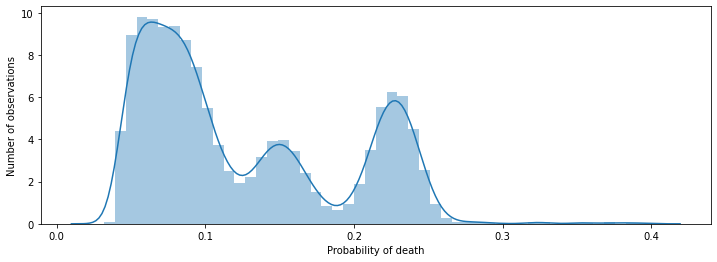

In [32]:
pd = hp['omega'] * (1 - hd[0].fc_all)
sns.distplot(pd);
plt.xlabel('Probability of death');
plt.ylabel('Number of observations');

In [33]:
dstat = np.array([(hp['omega']*(1-h.fc_all).mean(), hp['omega']*(1-h.fc_all).std()) for h in hd])
N_pop, p_d = cnt_stat[:, 0], dstat[:, 0]
N_death_expected = N_pop * p_d

p_d_mean = p_d.mean()
p_d_sem = np.sqrt((dstat[:, 1]**2).mean()/(n_trials-1))

print('Mean probability of death: {:.3f} ± {:.3f}'.format(p_d_mean, p_d_sem))
print('Expected number of deaths: {:.2f} ± ?'.format(N_death_expected.mean()))

Mean probability of death: 0.126 ± 0.023
Expected number of deaths: 29.03 ± ?


- The death-probability distribution shows three modes, indicating three groups of animals.
- An animal dies on average with a probability of 12.6%.
- The expected number of deaths per year is close to the observed value; computing its s.e.m is a bit more complex due to the product $p_d N_a$ and therefore not included here.

### Estimating the expected number of births

- When considering birth, we need to look at the surviving population from the previous year.
- Let $w^*=\zeta(w_b+\sigma_b)$ be the minimum weight for giving birth
- The number of animals giving birth is composed of the following groups
    - Animals with $w\geq w^*$ who can give birth in any case
    - Animals with $w^*-\beta F\leq w <w^*$ who can give birth if they get to eat
    - Animals who will not give birth because their fitness is too low
- The last group is small for $N\approx 200$ and we ignore them here.
- With the parameters we have, stillborns (baby weight too large) are astronomically unlikely and are ignored as well.

We first look at the weight distribution of surviving animals and then compute.

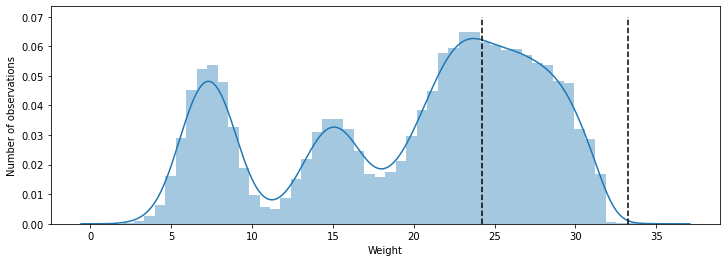

In [34]:
ws = hp['zeta'] * (hp['w_birth'] + hp['sigma_birth'])
wlb = ws - hp['beta'] * hp['F']

sns.distplot(hd[0].wc_srv);
plt.plot([wlb, wlb], [0, 0.07], 'k--');
plt.plot([ws, ws], [0, 0.07], 'k--');
plt.xlabel('Weight');
plt.ylabel('Number of observations');

In [35]:
p_e = np.zeros(n_trials)
n_iffood = np.zeros(n_trials)
n_defin = np.zeros(n_trials)
n_b = np.zeros(n_trials)
p_b = np.zeros(n_trials)

for i, h in enumerate(hd):
    p_e[i] = hp['f_max'] / hp['F'] / h.cnt_srv.mean()
    n_iffood[i] = p_e[i] * sum((wlb <= h.wc_srv) & (h.wc_srv < ws))
    n_defin[i] = sum(h.wc_srv >= ws)
    n_b[i] = n_iffood[i] + n_defin[i]
    p_b[i] = n_b[i] / len(h.wc_srv)

n_b /= n_yr
p_b_mean = p_b.mean()

print('Mean probability of birth: {:.3f} ± ?'.format(p_b.mean()))
print('Expected number of births: {:.2f} ± ?'.format(n_b.mean()))

Mean probability of birth: 0.145 ± ?
Expected number of births: 29.12 ± ?


- The weight distribution shows three clear peaks: babies, juveniles and adults.
- The dashed lines mark $w^*-\beta F$ and $w^*$, respectively
- The expected number of births fits very well with observed data; errors not given since a bit difficult to estimate here.
- The probability $\bar{p}_b$ of any animal giving birth during a year is 14.5%.
- We obtain an equilibrium inspite of the different probabilities for birth and death, because they apply to different populations.

We can test this:

In [36]:
print('Expected number of births: {:.1f}'.format(Ns_mean * p_b_mean))
print('Expected number of deaths: {:.1f}'.format(Na_mean * p_d_mean))

Expected number of births: 29.1
Expected number of deaths: 29.0


- We have $N_a$ and $N_s$ as population sizes before and after culling.
- Since we are interested in the stationary state, we assume them constant.
- By definition of death, we have $N_s = (1-p_d)N_a$.
- By definition of birth, we have $N_a = (1+p_b)N_s$.
- Inserting the second equation in the first, we obtain
\begin{align}
N_s &= (1-p_d)(1+p_b) N_s\\
1 &=(1-p_d)(1+p_b)
\end{align}
- This establishes a connection between the two probabilities which we can check:

In [37]:
(1-p_d_mean)*(1+p_b_mean)

1.000450321792706

- This looks sufficiently close to 1 to assume that our simulations and analysis are consistent.
- Unfortunately, it still does not allow us to model how population size $N_s$ depends on the amount of available fodder.

### Mass balance

- In the stationary state, the total animal mass should stay constant from year to year.
- Mass gain
    - occurs only through fodder eaten
    - assume that all available food is always eaten, i.e., $N_s F\gg f_{\text{max}}$
    - then annual weight gain is $\beta f_{\text{max}}$
- Mass loss
    - due to birth: $(\xi-1) w_b p_b N_s$
    - due to annual weight loss: $\eta \bar{w} N_a$ where $\bar{w}$ is the average animal weight across all animals before culling
    - due to death: $\hat{w} p_d N_a$ where $\hat{w}$ is the average weight of a dying animal
- Mass balance equation
\begin{equation}
\beta f_{\text{max}} = (\xi-1) w_b p_b N_s + \eta \bar{w} N_a + \hat{w} p_d N_a
\end{equation}
and with
\begin{align}
N_a &= (1+p_b) N_s \\
p_d &= 1-1/(1+p_b) 
\end{align}
from above we obtain
\begin{equation}
N_s = \frac{\beta f_{\text{max}}}{(\xi-1)p_b w_b+\eta(1+p_b)\bar{w}+p_b\hat{w}}\;.
\end{equation}
- We thus obtain a prediction for the population size.
- It still contains three parameters we need to measure: $p_b\approx 14.5\%$, $\bar{w}$, and $\hat{w}$.

In [38]:
wstat = np.array([(h.wc_all.mean(), h.wc_all.std(), h.wd.mean(), h.wd.std()) for h in hd])

w_all_mean = wstat[:, 0].mean()
w_death_mean = wstat[:, 2].mean()
w_all_sem = np.sqrt((wstat[:, 1]**2).mean()/(n_trials-1))
w_death_sem = np.sqrt((wstat[:, 3]**2).mean()/(n_trials-1))

print('Mean weight before culling: {:.1f} ± {:.2f}'.format(w_all_mean, w_all_sem))
print('Mean weight when dying    : {:.1f} ± {:.2f}'.format(w_death_mean, w_death_sem))

Mean weight before culling: 19.2 ± 2.68
Mean weight when dying    : 15.1 ± 2.66


In [39]:
Ns_pred = hp['beta']*hp['f_max'] / (
            (hp['xi']-1)*p_b_mean*hp['w_birth'] 
            + hp['eta']*w_all_mean*(1+p_b_mean)
            + w_death_mean*p_b_mean)
print(f'Expected size of herbivore population: {Ns_pred:.1f}.')

Expected size of herbivore population: 204.8.


This is in reasonable agreement with the measured $201.3 \pm 3.1$ measured.

Unfortunately, the prediction still depends on the *measured* quantities $p_b$, $\bar{w}$ and $\hat{w}$. A far more careful analysis would be required to be able to predict the population sizes directly from model parameters. Only this would allow us to make immediate predictions on how the population will change in response to parameter changes.

--------------------

## A simple life cycle: Newborn, Juvenile, Adult

##### The animal is a *baby* with weight $w_b\pm \sigma=8\pm 1.5$ units.
1. For $w=8$, the baby has fitness $\approx 0.45$ and probability of death $\approx 0.22$.
1. Until it eats, it loses $5\%\approx 0.4$ units of weight per year, with weight fitness dropping.
1. A baby will eat with probability $p_e=0.4$ and then add $\beta F=9$ units of weight.
1. Once a baby has eaten, it thus has $w\approx 17$ and is a *juvenile*. 
1. Since animals eat with $p_e=0.4$, it takes on average $2.5$ years until an animal eats for the first time. 
1. Babies are the leftmost mode in the weight distribution.

##### The animal becomes a *juvenile* within $\approx 5$ years with a $w\approx 17$ units.
1. Age fitness is still almost perfect.
1. Overall fitness is $\approx 0.67$ with probability of death $0.13$.
1. The animal loses $\approx 0.9$ units of weight per year.
1. Since the animal eats every 2.5 years on average, most animals will eat before they have lost more than 4 units of weight.
1. The first meal as juvenile thus brings the animal to $22-26$ units of weight and it becomes an *adult*.
1. The middle mode of the weight distribution are the juveniles.

    
##### The animal becomes an adult within 10 years of birth after eating twice, usually faster (5 years)
1. Adults are animals that can give birth the following year, i.e., have $w\geq \zeta (w_b+\sigma)=33.25$ units after eating in the following year.
1. Strictly speaking, adulthood is thus reached in the first year with $w\geq w_A = (\zeta(w_b+\sigma)-\beta F)/(1-\eta) \approx 25.5$ units.
1. With $N\approx 200$ animals in the location, any animal with sufficient weight will give birth.
1. Upon giving birth, the animal loses on average $\xi w_b=9.6$ units of weight.
1. This explains why we observe no weights above 33 units.
1. With adult weights from 25.5–33.25 units, average adult weight in the year before giving birth will be $\approx 29.4$ units.
1. After eating and giving birth, the average weight will then be $\approx 29.4 + 9 - 9.6=28.8$ units.
1. An adult who does not eat, loses $\approx 1.5$ units of weight.
1. In the average $2.5$ years between two meals, the animal loses $\approx 4$ units of weight, while eating once adds $9$ units, so net gain is $5$ units per $2.5$ years.
1. An animal loses $\approx 9.6$ units on birth, so it takes two feeding cycles or $5$ years to be able to give birth again.
1. An adult gives birth approximately once every 5 years.
    

--------------------------

### Death of newborns—How many newborns die without every eating?

1. Start with $w_0=w_b$.
2. With probability $1-p_e$, the animal does not eat.
3. Weight at end of year then is $w_1=(1-\eta)w_0$.
4. Two possibilities
    1. Animal dies with probability $\pi(1, w_1)=\omega(1-\Phi(1, w_1))$
    1. Animal survives with probability $1-\pi(1, w_1)$
5. If animal survived, continue with step 2.

The total probability of dying without ever eating is the sum of the probability of dying in year 1, 2, 3, ..., with ever decreasing weight and thus fitness. Note that $w>0$ always, even though $w\to 0+$ for $t\to\infty$.

Mathematically, the probability of newborn starvation is thus

\begin{align}
P_S &= \pi(1, w_1) + (1-\pi(1, w_1))
         \left[(1-p_e)\pi(2, w_2) + (1-p_e)(1-\pi(2, w_2))\left[(1-p_e)\pi(3, w_3) + \cdots \right]\right] \\
    &= \pi(1, w_1) + (1-p_e)(1-\pi(1, w_1))\pi(2, w_2) + \dots \\
    &= \sum_{n=1}^{\infty} \left[ \pi(n, w_n) (1-p_e)^{n-1} \prod_{k=1}^{n-1} 1-\pi(k, w_k) \right]
\end{align}

with $w_k=(1-\eta)^k w_b$. In the sum,
- the first term $\pi(n, w_n)$ describes the probability of dying in year $n$
- the second term $(1-p_e)^{n-1}$ the probability of not eating for the first $n$ years (animals does not eat in year it is born, therefore $-1$)
- the third (product) term the probability of not dying during the first $n-1$ years.

The expression for $P_S$ can only be evaluated numercially. As a first approximation, we can assume a fixed value for $\pi(a, w)$ throughout the interval, since fitness does not vary much. Let us define

$$\bar{\pi} = \pi(1, w_b/2) = \omega(1-\Phi(1, w_b/2))$$

and use this value to estimate $p_S$. Then we have

\begin{align}
\bar{P}_S &= \sum_{n=1}^{\infty} \bar{\pi}(1-p_e)^{n-1}(1-\bar{\pi})^{n-1} \\
          &= {\bar{\pi}} \sum_{n=0}^{\infty} \left[(1-p_e)(1-\bar{\pi})\right]^n \\
          &= \frac{\bar{\pi}}{1-(1-p_e)(1-\bar{\pi})}
\end{align}

where we have used the geometric sum formula in the last step.

We can now compute $\bar{P}_S$:

In [40]:
pibar = hp['omega'] * ( 1 - Phi(1, hp['w_birth']/2) )
print('Approximate probability of death: {:.3f}'.format(pibar))

Approximate probability of death: 0.258


Thus, the baby dies with $\approx 26\%$ probability in any given year.

In [41]:
p_e = 0.4
PSbar = pibar / (1 - (1-p_e)*(1-pibar))
print('Estimated percentage of babies dying: {:.1f}%'.format(100*PSbar))

Estimated percentage of babies dying: 46.5%


This suggests that almost half of all babies die without ever eating, i.e., without becoming juveniles.

We can now also evaluate the full expression numerically. The evaluation requires us to specify a number of animals that will compete for food. This is the number of animals surviving to the subsequent year.

In [42]:
def baby_death(par, w_0=None, a_max=50, N_eaters=200):
    w_0 = w_0 if w_0 is not None else par['w_birth']
    p_e = (par['f_max'] / par['F']) / N_eaters
    a = np.arange(1, a_max)
    w = w_0 * (1-par['eta'])**a
    f = Phi(a, w)
    pd = par['omega'] * (1-f)
    pl = np.hstack([np.array([1]), 1-pd[:-1]])
    Pl = np.cumprod(pl)
    pS = pd * (1-p_e)**(a-1) * Pl
    PS = np.cumsum(pS)
    
    return a, PS, pS, f

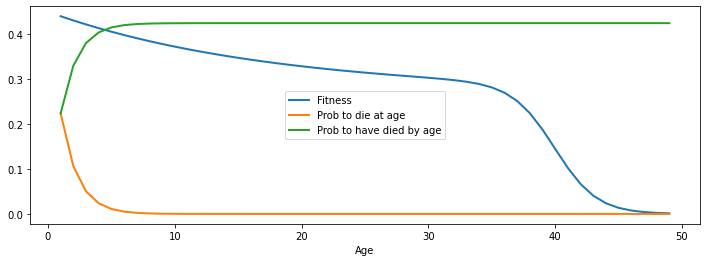

In [43]:
a, PS, pS, f = baby_death(hp, N_eaters=Ns_mean)

plt.plot(a, f, lw=2, label='Fitness');
plt.plot(a, pS, lw=2, label='Prob to die at age');
plt.plot(a, PS, lw=2, label='Prob to have died by age');
plt.legend();
plt.xlabel('Age');

In [44]:
print('Probability to die as baby P_S = {:.1f}%'.format(100*PS[-1]))

Probability to die as baby P_S = 42.5%


Thus, the full analysis shows that 42.5% of all newborns die without every having eaten and they do so before they are 10 years old. We could further refine this estimate by averaging over birth weights and number of eaters, but skip that for now.

#### Compare to simluation results

- When considering how many animals die as babies, we look at the fate of individuals, not the evolution of populations. We therefore need to work with cohort data, i.e., data containing the full lifespan of all animals in the sample.
- Individuals for which weight decays by $1-\eta$ on all time steps from birth to death die as babies.

In [45]:
def dies_as_baby(w, eta):
    w = w.compressed()  
    return len(w) < 2 or np.isclose(w[1:], (1-eta)*w[:-1]).all()    

p_baby_death = np.zeros(n_trials)
for k, h in enumerate(hd):
    dead_babies = np.array([dies_as_baby(h.w_coh[:, k], hp['eta']) 
                            for k in range(h.w_coh.shape[1])])
    p_baby_death[k] = sum(dead_babies) / len(dead_babies)
    
p_baby_death_mean = p_baby_death.mean()
p_baby_death_sem = p_baby_death.std() / np.sqrt(n_trials-1)

print('Probability of death as baby: {:.1f}% ± {:.1f}%'.format(
      100*p_baby_death_mean, 100*p_baby_death_sem))

Probability of death as baby: 42.8% ± 0.2%


This is in good agreement with the theoretical expectation.

------------------------------

## Fitness after birth

- We look closer at the fitnesses of newborn and their parents at the time of birth
    1. Newborns are born with weight $\mathcal{N}(w_b, \sigma)$
        - Newborns usually have fitnesses in $\Phi(0, w_b \pm 2\sigma$).
    1. To be able to give birth, a parent needs a weight of at least $\zeta(w_b + \sigma)$.
    1. Since we often have $N>10$ animals in a cell, each animal almost certainly gives birth as soon as it has the minimum weight required.
- Lowest birth-giving weight
    - animal ate at beginning of year and just made it across threshold
    - weight: $\zeta(w_b + \sigma)$
- Highest birth-giving weight
    - animal was just below threshold the previous year
    - lost weight at end of previous year
    - ate this year
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F$
- "Lowest" parent weight after birth (lightest parent, heaviest baby)
    - weight: $\zeta(w_b + \sigma) - \xi(w_b + 2\sigma)$
- "Highest" parent weight after birth (heaviest parent, lightest baby)
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F - \xi(w_b - 2\sigma)$

In [46]:
def plot_pf(age, clr):
    lo = ( hp['zeta'] * (hp['w_birth']+hp['sigma_birth'])
           - hp['xi'] * (hp['w_birth']+2*hp['sigma_birth']) )
    hi = ( (1-hp['eta'])*hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     + hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth']) )
    plt.fill_between(x, Phi(age*np.ones_like(x), lo), 
                        Phi(age*np.ones_like(x), hi), 
                 color=clr, alpha=.2, label=r'Parent fitness ($a={}$)'.format(age))

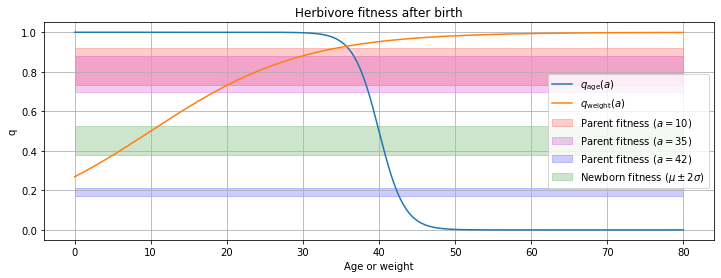

In [47]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plot_pf(10, 'r')
plot_pf(35, 'm')
plot_pf(42, 'b')
plt.fill_between(x, 
                 Phi(np.zeros_like(x), hp['w_birth']-2*hp['sigma_birth']), 
                 Phi(np.zeros_like(x), hp['w_birth']+2*hp['sigma_birth']), 
                 color='g', alpha=.2, label=r'Newborn fitness $(\mu\pm 2\sigma)$')


plt.title('Herbivore fitness after birth');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Observations from the figure:
- Up to age 35, parents are fitter than newborns after birth (weight is more important than age)
- Beyond age 42, parents are less fit than newborns (age more important than weight)
- Since carnivores hunt the weakest animals first, older parents in some way "sacrifice" themselves for the benefit of newborns.
- Young adults are quite safe from carnivores.